# Plot cross-correlation between dlight and syllable frequency

In [1]:
import toml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from rl_analysis import ANALYSIS_CONFIG
from rl_analysis.plotting import save_factory, bootstrap_lineplot, add_legend, fg, setup_plotting_env, clean_ticks

In [2]:
with open(ANALYSIS_CONFIG, 'r') as f:
    config = toml.load(f)

setup_plotting_env()
saver = save_factory(join(config['figures']['dir_wg'], 'fig-02'), tight_layout=False)

In [3]:
xcorrs_df = pd.read_pickle('/home/wg41/reinforcement_data/public-dataset/3min_max_dlight_0-0.3s_vs_usage.p')
shuffs_df = pd.read_parquet('/home/wg41/reinforcement_data/public-dataset/3min_max_dlight_0-0.3s_vs_usage_shuffled_agg.parquet')
c = xcorrs_df.mean(1)
m = shuffs_df.reset_index().melt(id_vars='lag')

## Plot xcorr vs shuffle

In [4]:
sm = m.set_index('lag')

In [5]:
z_c = (c - m.groupby('lag')['value'].mean()) / m.groupby('lag')['value'].std()

In [6]:
mu = m.groupby('lag')['value'].mean().reindex(sm.index)
std = m.groupby('lag')['value'].std().reindex(sm.index)

In [7]:
sm['z_value'] = (sm['value'] - mu) / std

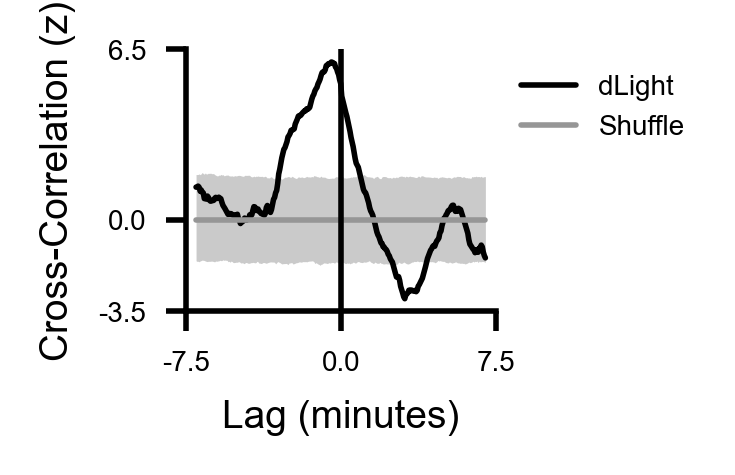

In [8]:
fig = fg(1, 0.85)
fig.dpi = 200
z_c.plot(color="k", linewidth=1, label="dLight")
ax = bootstrap_lineplot(sm, x="lag", y="z_value", ci=95, color=(150 / 255,) * 3, label="Shuffle")
ax.set(ylabel="Cross-Correlation (z)", xlabel="Lag (minutes)", xlim=(-7.5, 7.5))
clean_ticks(ax, axis="x")
clean_ticks(ax, axis="y", zero_symmetry=False, precision=1)

plt.axvline(0, color="k", linewidth=1)
sns.despine()
add_legend(ax)
saver(fig, "dlight-fluor-usage-z-xcorr");